In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# PubChem AID 	167201

## Assay info
Cytochrome P450 (CYP) enzymes are membrane-bound hemeproteins that play a key role in metabolism of drugs and xenobiotics. Evaluation of the effect of chemicals on CYP isozymes is useful to minimize the adverse drug reactions and toxicities in drug development process. Tox21 chemicals were tested for their effect on CYP enzyme activities by using P450-Glo (TM) screening systems (Promega Corporation, Madison, WI). These systems provide a luminescent method containing proluciferin substrates and are converted to luciferin products by CYP isozymes. The luciferin products formed are detected with a luciferin detection reagent, and the amount of light produced is proportional to CYP activity. P450-Glo (TM) CYP3A4 screening system (Catalog. No. V9910) was used to detect the compounds that interfere in CYP3A4 activity. The positive control compound used for CYP3A4 assay is ketoconazole (Sigma-Aldrich, St. Louis, MO).

In [3]:
df = pd.read_csv("PubChem_AID_167201/AID_1671201_datatable_all.csv")

/tmp/ipykernel_157975/3456283058.py:1: DtypeWarning: Columns (0,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,50,51,52,53,55,56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,90,91,92,93,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,

In [4]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype-Replicate_1',
 'Potency-Replicate_1',
 'Efficacy-Replicate_1',
 'Analysis Comment-Replicate_1',
 'Activity_Score-Replicate_1',
 'Curve_Description-Replicate_1',
 'Fit_LogAC50-Replicate_1',
 'Fit_HillSlope-Replicate_1',
 'Fit_R2-Replicate_1',
 'Fit_InfiniteActivity-Replicate_1',
 'Fit_ZeroActivity-Replicate_1',
 'Fit_CurveClass-Replicate_1',
 'Excluded_Points-Replicate_1',
 'Max_Response-Replicate_1',
 'Activity at 0.0000074871 uM-Replicate_1',
 'Activity at 0.0000171744 uM-Replicate_1',
 'Activity at 0.0000679832 uM-Replicate_1',
 'Activity at 0.0001617185 uM-Replicate_1',
 'Activity at 0.0003741538 uM-Replicate_1',
 'Activity at 0.0007703449 uM-Replicate_1',
 'Activity at 0.00214 uM-Replicate_1',
 'Activity at 0.00651 uM-Replicate_1',
 'Activity at 0.017 uM-Replicate_1',
 'Act

In [5]:
# first 5 rows are metadata 
df[0:5]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 23.64 uM-Replicate_51,Activity at 52.95 uM-Replicate_51,Activity at 115.2 uM-Replicate_51,Activity at 299.6 uM-Replicate_51,Activity at 1087.9 uM-Replicate_51,Activity at 2306.0 uM-Replicate_51,Activity at 5157.0 uM-Replicate_51,Activity at 11530.0 uM-Replicate_51,Activity at 25780.0 uM-Replicate_51,Activity at 57660.0 uM-Replicate_51
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,FLOAT,...,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indicates type of activity observed: inhibitor...,Concentration at which compound exhibits half-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head(10)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype-Replicate_1,Potency-Replicate_1,...,Activity at 23.64 uM-Replicate_51,Activity at 52.95 uM-Replicate_51,Activity at 115.2 uM-Replicate_51,Activity at 299.6 uM-Replicate_51,Activity at 1087.9 uM-Replicate_51,Activity at 2306.0 uM-Replicate_51,Activity at 5157.0 uM-Replicate_51,Activity at 11530.0 uM-Replicate_51,Activity at 25780.0 uM-Replicate_51,Activity at 57660.0 uM-Replicate_51
0,1,144205501.0,17931.0,CN1C(=S)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,Inconclusive,21.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,15.4871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,144206117.0,3045407.0,CO[C@H]1[C@@H](C[C@@H]2CN3CCC4=C([C@H]3C[C@@H]...,Active,85.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,2.1876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,144206325.0,14708.0,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C)O)CC[C@@...,Active,61.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,17.3768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,144206326.0,3085168.0,CC1=NC=C(C(=N1)N)CN(C=O)/C(=C(\CCO)/SS/C(=C(/C...,Active,41.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,15.4871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,144206328.0,54158.0,CC1=CC(=C(C(=C1NC(=O)CN(CC(=O)O)CC(=O)O)C)Br)C,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,144206329.0,92140.0,CCCC(=O)OC[C@H]([C@H]([C@H](CN1C2=C(C=C(C(=C2)...,Active,86.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,1.5487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,144206330.0,6505.0,CCCCOC(=O)CC(CC(=O)OCCCC)(C(=O)OCCCC)OC(=O)C,Active,84.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,2.754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,144206333.0,54708862.0,C1=CC=C(C(=C1)C(=O)O)[O-].C1=CC=C(C(=C1)C(=O)O...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,144206369.0,11956149.0,C[C@@H](C(=O)C1=CC=CC=C1)N.Cl,Active,80.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inhibitor,37.5919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,144206371.0,3058692.0,C[C@H]1[C@H](OC(=N1)N)C2=CC=CC=C2,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/tox21-...,NaN,Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype-Replicate_1',
       'Potency-Replicate_1',
       ...
       'Activity at 23.64 uM-Replicate_51',
       'Activity at 52.95 uM-Replicate_51',
       'Activity at 115.2 uM-Replicate_51',
       'Activity at 299.6 uM-Replicate_51',
       'Activity at 1087.9 uM-Replicate_51',
       'Activity at 2306.0 uM-Replicate_51',
       'Activity at 5157.0 uM-Replicate_51',
       'Activity at 11530.0 uM-Replicate_51',
       'Activity at 25780.0 uM-Replicate_51',
       'Activity at 57660.0 uM-Replicate_51'],
      dtype='object', length=2049)

In [9]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

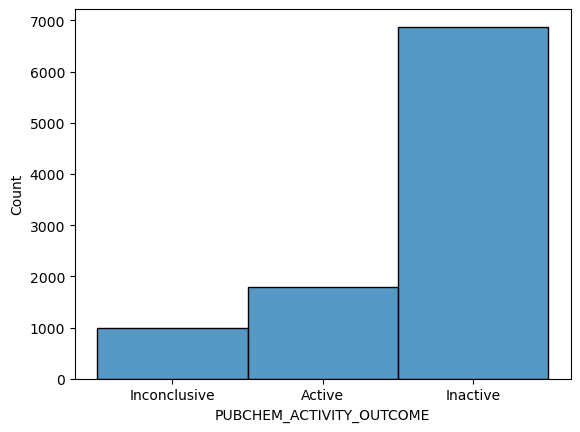

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

In [11]:
import matplotlib.pyplot as plt

In [12]:
df["PUBCHEM_ACTIVITY_SCORE"]

0       21.0
1       85.0
2       61.0
3       41.0
4        0.0
        ... 
9662     0.0
9663     0.0
9664    83.0
9665     0.0
9666     0.0
Name: PUBCHEM_ACTIVITY_SCORE, Length: 9667, dtype: float64

In [13]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [14]:
len(df)

9667

In [15]:
df = df.dropna(subset="PUBCHEM_SID")

In [16]:
len(df)

9667

In [17]:
df["PUBCHEM_SID"] = df["PUBCHEM_SID"].astype(int)
# df["PUBCHEM_CID"] = df["PUBCHEM_CID"].astype(int)

In [18]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [19]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [ ]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df[mol_col].progress_apply(lambda x: standardize_smiles(x))

  1%|█▋                                                                                                                                              | 111/9667 [00:00<01:21, 117.83it/s]

In [ ]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [ ]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

In [ ]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

In [ ]:
df.dropna(subset="INCHIKEY")

In [ ]:
# lets gather up the activities?

In [ ]:
# ok, clean up DF, and segement into active and inactives,

In [ ]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [ ]:
clean = df[keep_cols]

In [ ]:
clean["dataset"] = "aid167201"
clean["data_type"] = "assay"

In [ ]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

In [ ]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

In [ ]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "inhibitor"
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

In [ ]:
clean.to_csv("./processed/AID_167201.csv", index=False)

In [ ]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok